#Linear Hypothesis

## H(x) = Wx + b
- 이 가설은 공식처럼 고정된게 아님. 그냥 내가 세우는 것임.
- W와 b의 값에 따라 선의 모양이 달라진다.
- 선형회귀는 데이터를 설명하는 가장 적합한 선을 찾아가는 과정임. W, b의 값을 찾아가는 과정.

## Cost function
- 내가 그은 선과 실제 데이터(점)의 차이를 계산하면서, 그 차이가 최대한 작아지는 것을 찾는 것.
    * == cost가 가장 작아야 함
    * Gradient Descent Algorithm(경사하강법)을 적용하면 Cost function을 minimize 할 수 있음
- (H(x)-y)^2
- 점이 3개일 때 계산식
- $$
\frac{(H(x^{(1)}) - y^{(1)})^2 + (H(x^{(2)}) - y^{(2)})^2 + (H(x^{(3)}) - y^{(3)})^2}{3}
$$
- $$\
\text{cost} = \frac{1}{m} \sum_{i=1}^{m} (H(x^{(i)}) - y^{(i)})^2
$$ m = 데이터 개수
### Goal: Minimize Cost
$$
\min_{W, b} \text{cost}(W, b)
$$
- cost를 가장 줄일 수 있는 W, b를 찾는 것이 목표임(기계적으로!)

# 1. Build graph using TF operations

In [ ]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
# X and Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

# tf.Variable은 텐서플로우가 사용하는 변수임. 우리가 아는 변수와는 다른 개념. 텐서플로우가 실행할 때마다 변하는 값임.
W = tf.Variable(tf.random.normal([1]), name='weight') #[1] = 랭크가 1이라는 것을 선언한 것.
b = tf.Variable(tf.random.normal([1]), name='bias')

# Our hypothesis XW+b
hypothesis = x_train * W + b

$$\
\text{cost} = \frac{1}{m} \sum_{i=1}^{m} (H(x^{(i)}) - y^{(i)})^2
$$

In [ ]:
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

In [ ]:
# GradientDescent

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

#### 그래프 생성 끝, 다음은 그래프 실행하고 결과 얻기

# 2. Run/update graph and get results

In [ ]:
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(2001):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))

#### 이 모델은 데이터가 X=1, Y=1 이런 형식이기 때문에 Y = Wx + b 식을 만족하려면 W=1, b=0 이어야 함.
#### 가장 적합한 선은 W가 1, b가 0에 가까운 것임. => 2000번 반복실행 하여 W=1, b=0으로 수렴해 가는 과정이 '훈련'임.

0 10.52798 [-0.99135363] [1.1748042]
20 0.47629628 [0.16200322] [1.5857874]
40 0.3502053 [0.30229658] [1.5556521]
60 0.31731525 [0.34469467] [1.4867693]
80 0.2881839 [0.37640655] [1.4172988]
100 0.26173314 [0.4058003] [1.3507291]
120 0.23771034 [0.4337338] [1.2872537]
140 0.21589224 [0.460347] [1.2267578]
160 0.19607683 [0.4857088] [1.1691047]
180 0.17808 [0.50987875] [1.1141608]
200 0.16173516 [0.5329126] [1.0617995]
220 0.14689048 [0.5548639] [1.0118989]
240 0.13340822 [0.5757838] [0.9643432]
260 0.12116349 [0.59572035] [0.9190226]
280 0.11004264 [0.61472] [0.87583196]
300 0.09994251 [0.6328267] [0.8346712]
320 0.09076939 [0.6500825] [0.79544467]
340 0.08243821 [0.66652733] [0.75806177]
360 0.07487168 [0.68219936] [0.7224354]
380 0.06799967 [0.69713485] [0.68848366]
400 0.06175838 [0.7113684] [0.6561276]
420 0.05608998 [0.7249329] [0.62529206]
440 0.050941825 [0.7378601] [0.5959056]
460 0.04626617 [0.75017977] [0.5679003]
480 0.042019684 [0.7619203] [0.5412111]
500 0.038162965 [0.773

## Placeholder를 이용한 구현

In [ ]:
W = tf.Variable(tf.random_normal([1], name='weight'))
b = tf.Variable(tf.random_normal([1], name='bias'))
X = tf.placeholder(tf.float32, shape=[None]) # shape=[None] 의미: 1개든 10개든 아무 값이나 올 수 있음을 의미.
Y = tf.placeholder(tf.float32, shape=[None])

In [ ]:
# Our hypothesis XW+b
hypothesis = X * W + b

In [ ]:
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [ ]:
# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

In [ ]:
# Launch the graph in a session
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# Fit the line with new training data
#### 위쪽에서 Placeholder로 자리 만들어놓고, feed_dict 값만 바꿔끼울 수 있어 편리함

for step in range(10001):
    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train],
                                feed_dict={X: [1, 2, 3, 4, 5],
                                           Y: [2.1, 3.1, 4.1, 5.1, 6.1]})
    if step % 200 == 0:
        print(step, cost_val, W_val, b_val)

0 27.900574 [0.44710258] [-1.2359086]
200 0.19432764 [1.2852296] [0.07023071]
400 0.05014248 [1.1448873] [0.5769109]
600 0.012938333 [1.073598] [0.8342875]
800 0.003338489 [1.0373853] [0.96502686]
1000 0.000861431 [1.0189905] [1.031438]
1200 0.00022227802 [1.0096467] [1.0651726]
1400 5.7356927e-05 [1.0049003] [1.0823083]
1600 1.4800685e-05 [1.0024892] [1.0910131]
1800 3.819378e-06 [1.0012646] [1.0954347]
2000 9.859907e-07 [1.0006425] [1.0976803]
2200 2.5462614e-07 [1.0003266] [1.098821]
2400 6.5826136e-08 [1.0001659] [1.0994004]
2600 1.7060302e-08 [1.0000845] [1.099695]
2800 4.4188253e-09 [1.0000432] [1.0998446]
3000 1.1718839e-09 [1.000022] [1.0999199]
3200 3.3537617e-10 [1.0000119] [1.0999572]
3400 7.504468e-11 [1.0000058] [1.0999795]
3600 7.504468e-11 [1.0000058] [1.0999795]
3800 7.504468e-11 [1.0000058] [1.0999795]
4000 7.504468e-11 [1.0000058] [1.0999795]
4200 7.504468e-11 [1.0000058] [1.0999795]
4400 7.504468e-11 [1.0000058] [1.0999795]
4600 7.504468e-11 [1.0000058] [1.0999795]
4

In [ ]:
#### Testing our model
print(sess.run(hypothesis, feed_dict={X: [5]})) # X가 5라면 Y는 1.1을 더한 6.1로 예측해야 함
print(sess.run(hypothesis, feed_dict={X: [2.5]}))
print(sess.run(hypothesis, feed_dict={X: [1.5, 3.5]}))

#### 예측 성공
# [6.100351]
# [3.5997205]
# [2.5994682 4.5999722]

[6.1000085]
[3.5999942]
[2.5999885 4.6      ]


In [ ]:
print(sess.run(hypothesis, feed_dict={X: [1.5, 3.5, 69, 656, 695.23215, 8864, 33224]}))

[2.5999885e+00 4.5999999e+00 7.0100388e+01 6.5710382e+02 6.9633624e+02
 8.8651514e+03 3.3225297e+04]


## 경사하강법(Gradient Descent Algorithm)
- Cost function의 모양이 Convex function처럼 나와야만 함.(밥그릇 엎어놓은 것처럼 되어야 함)
    - 그래야 어느 지점에서 Linear Regression을 시작하든 minimize Cost(W, b) 가능함
    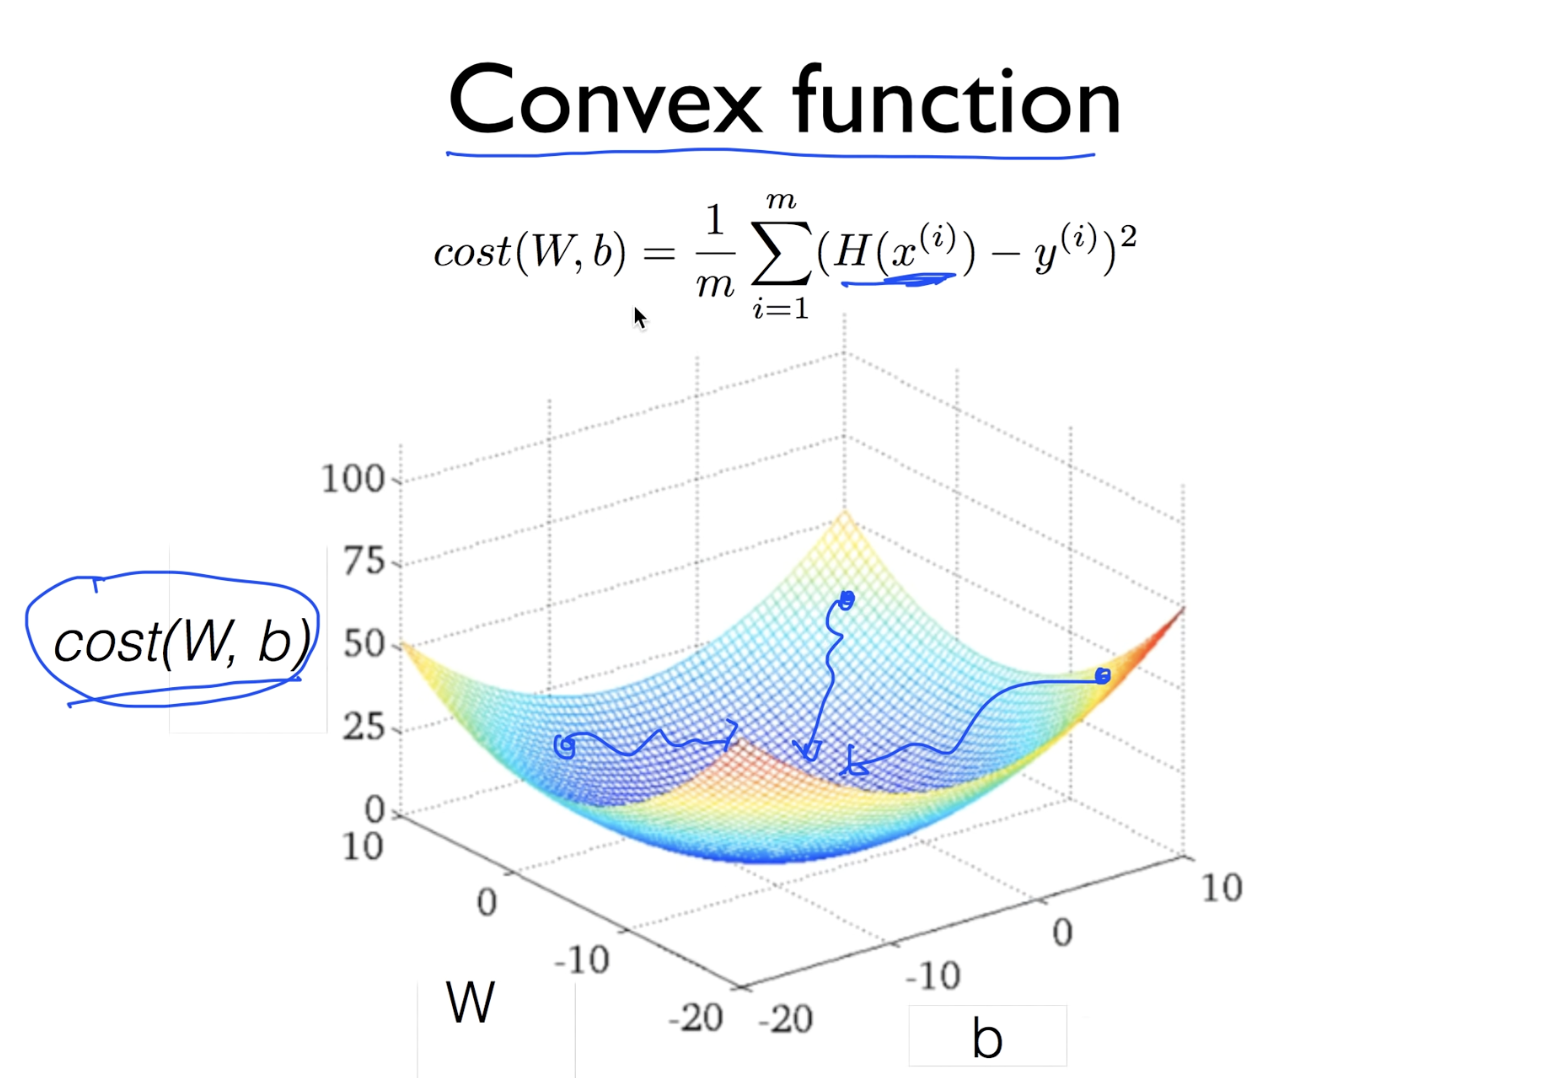
    - !!만일 Non-convex 형태로 나오게 되면, 어느 지점에서 시작했는지에 따라 W, b 값이 달라질 수 있음!! 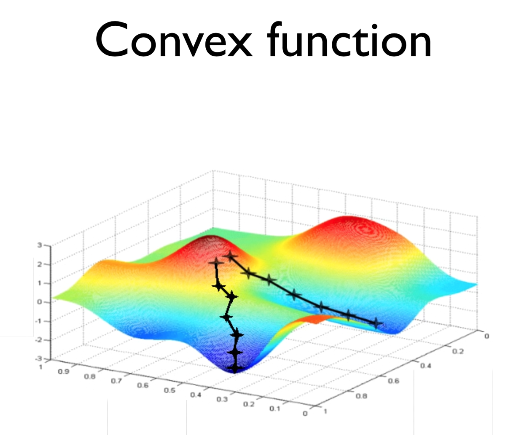